In [24]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
file = uproot.open("/home/users/nandan/tmp/CMSSW_14_1_5/src/RecoLocalTracker/SiStripClusterizer/test/test_study.root")  # replace with your ROOT file path
tree = file["sep19_2_2_dump_raw/tree"]

In [48]:
branches_to_load = ['target']
for var in ['validhits', 'chi2',\
            'd0sigma', 'dzsigma', 'dz', 'dxy',\
            'pt', 'pterr', 'dr_min', 'eta', 'phi',\
            'qoverp', 'qoverperror']:
    for trk in ['pixeltrk', 'hlttrk', 'recotrk']:
        branches_to_load.append(trk+'_'+var)
df = tree.arrays(branches_to_load, library="pd")

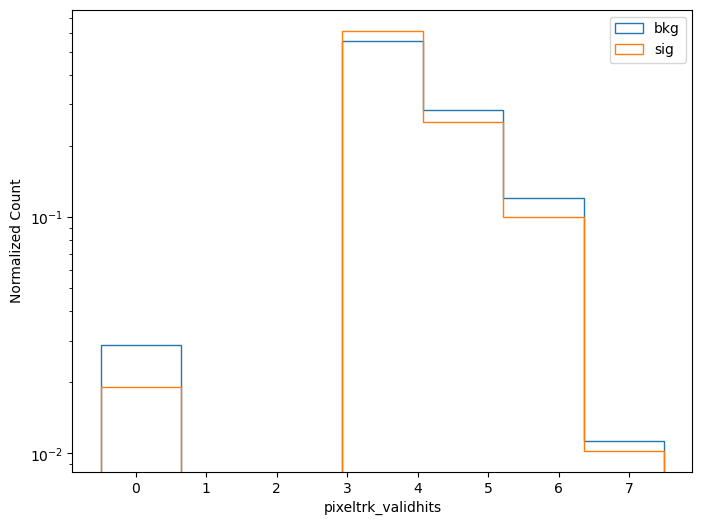

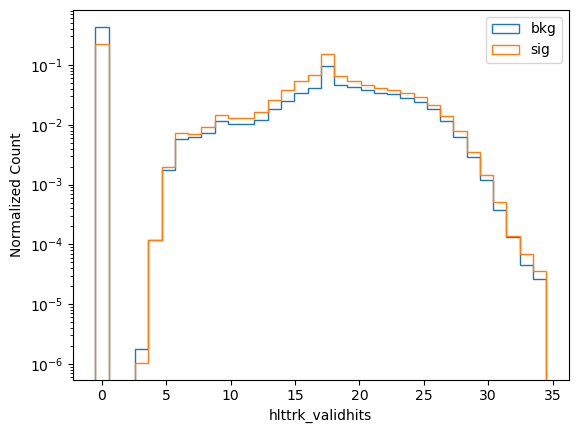

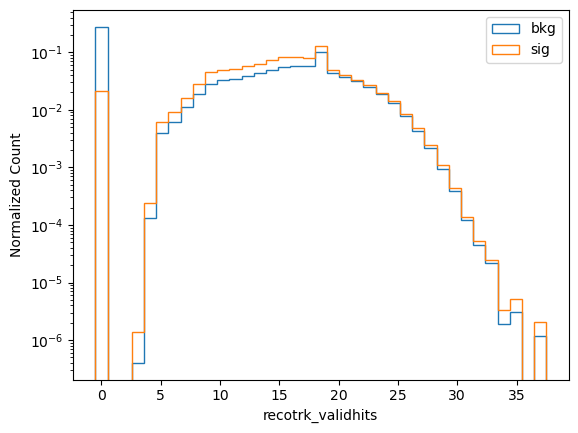

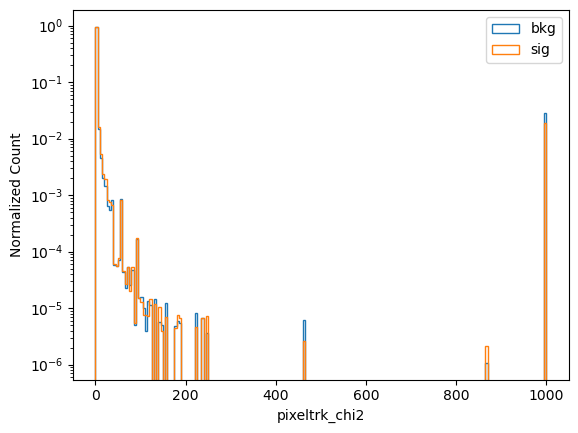

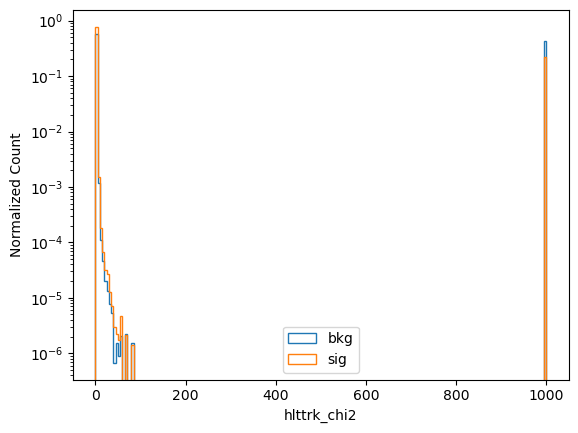

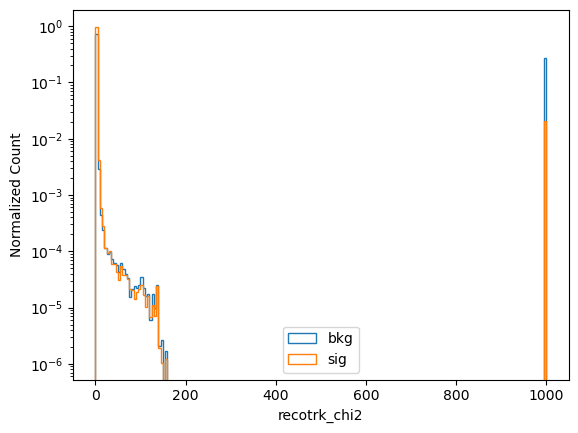

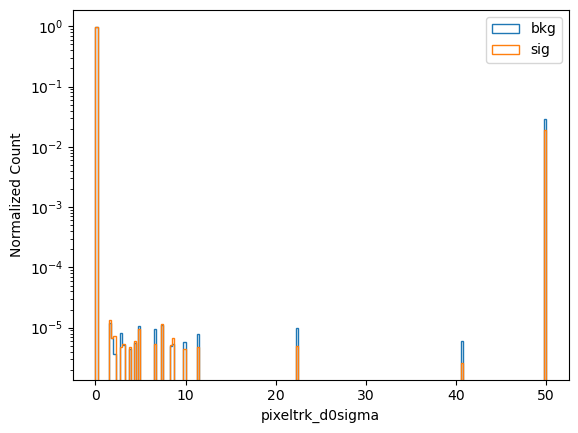

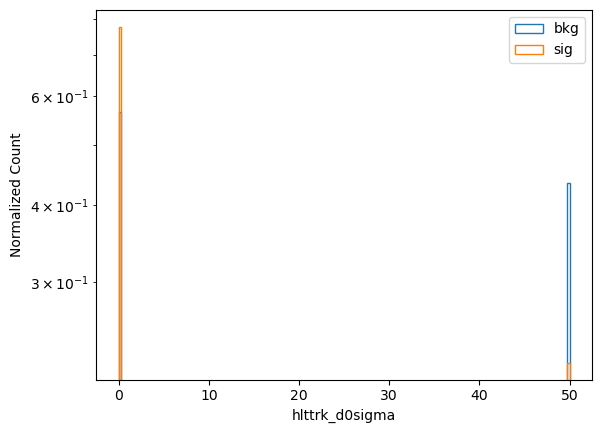

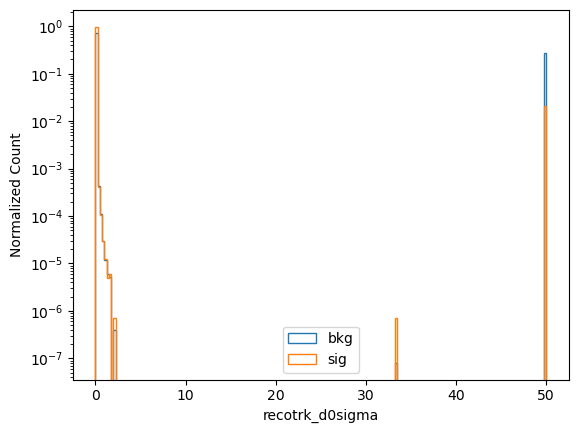

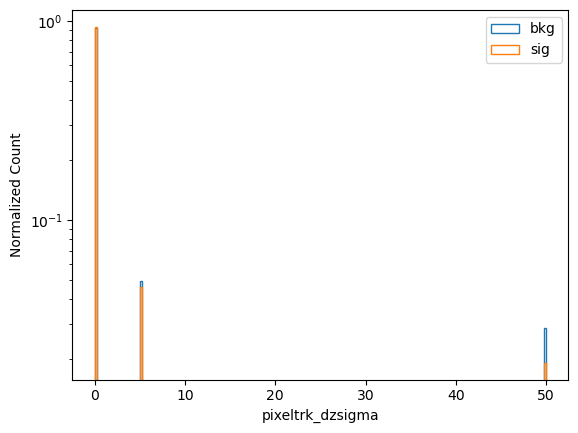

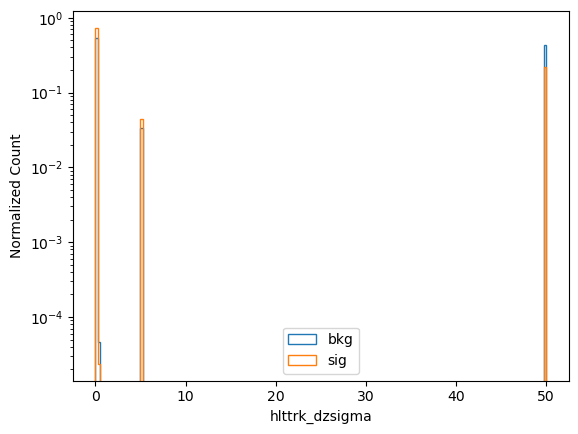

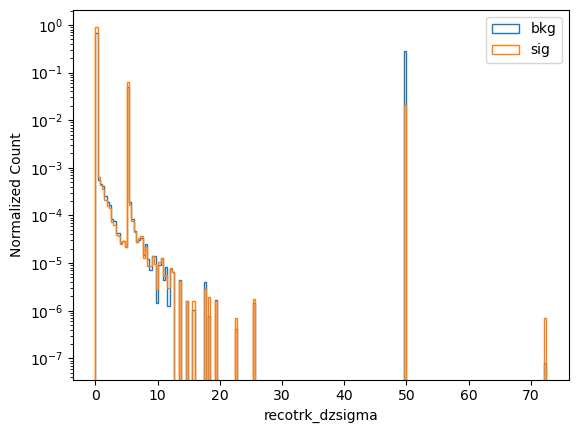

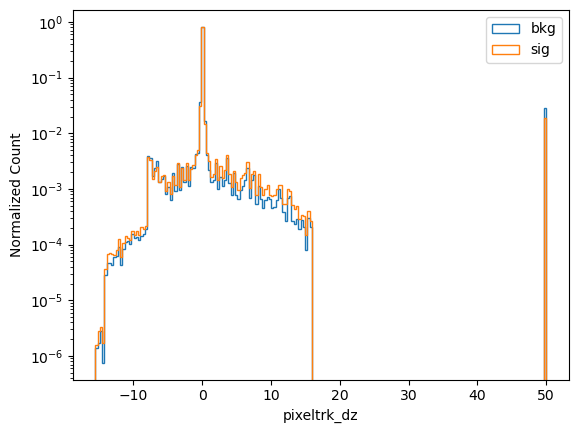

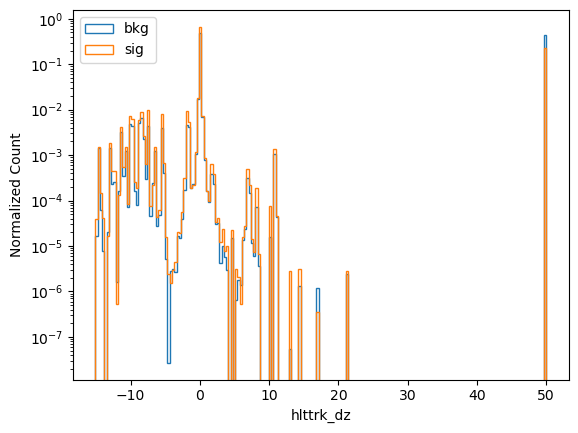

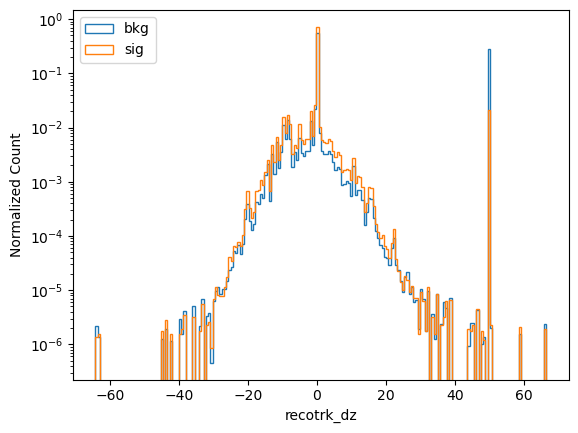

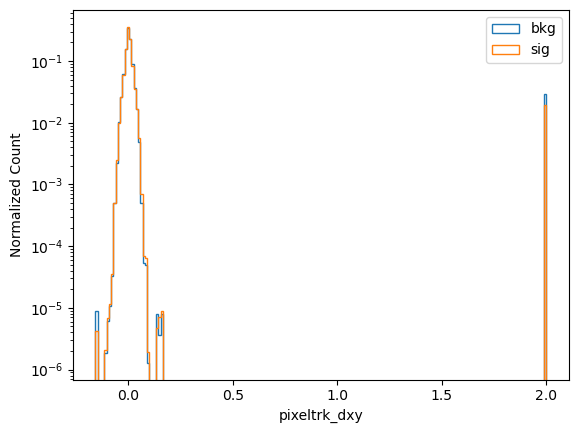

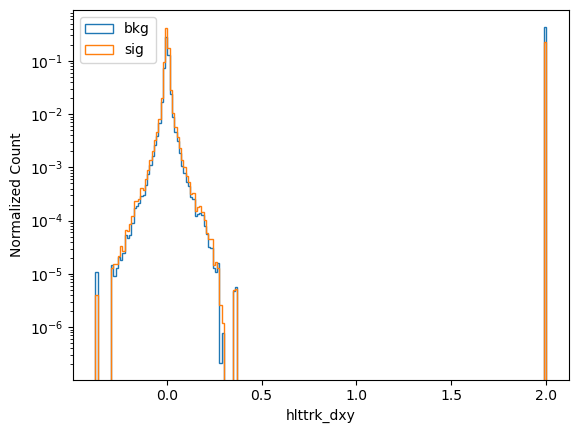

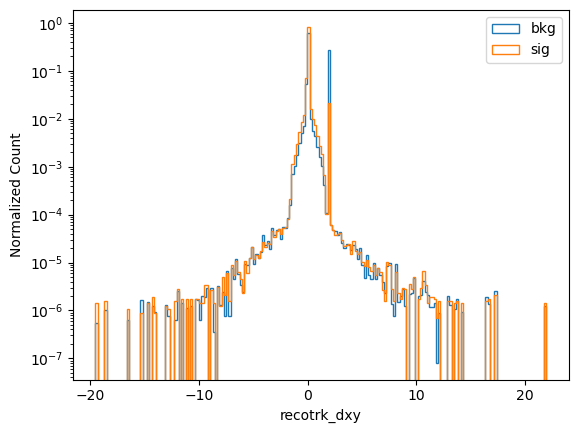

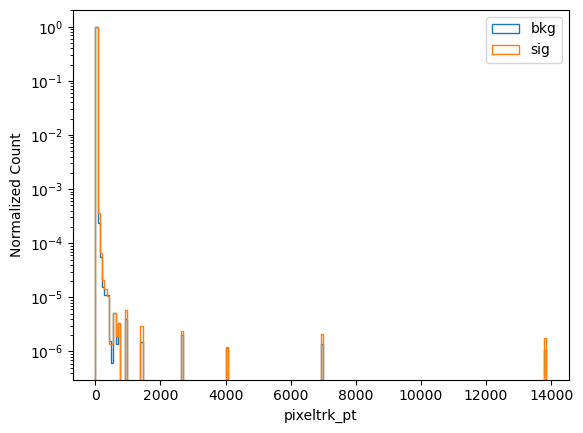

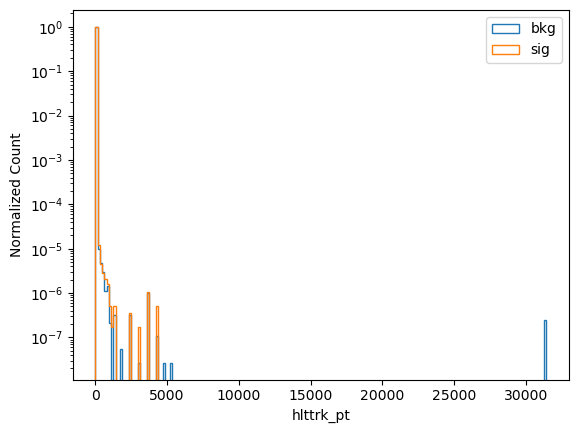

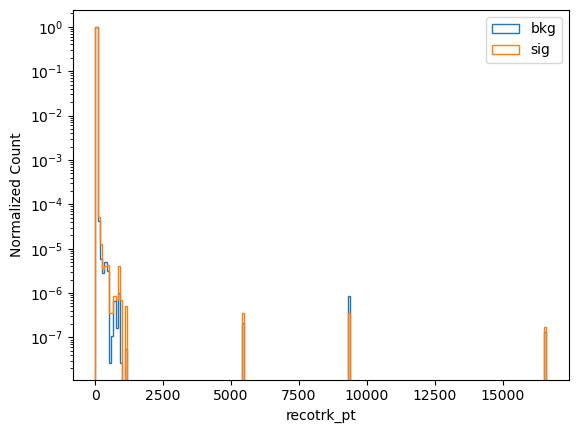

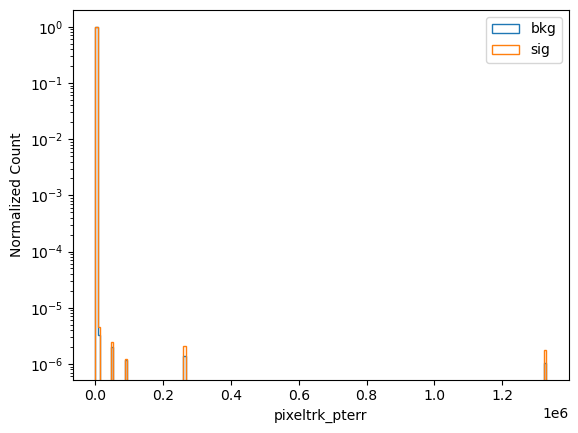

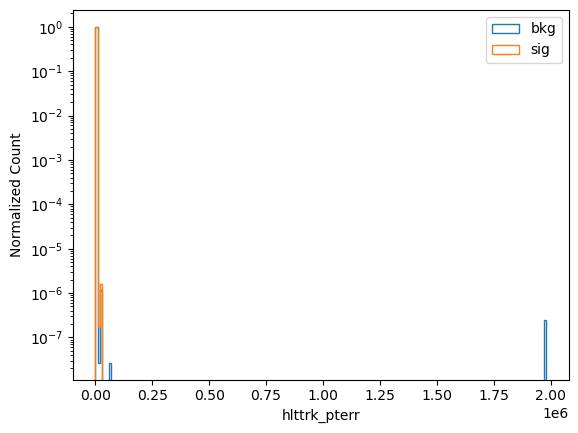

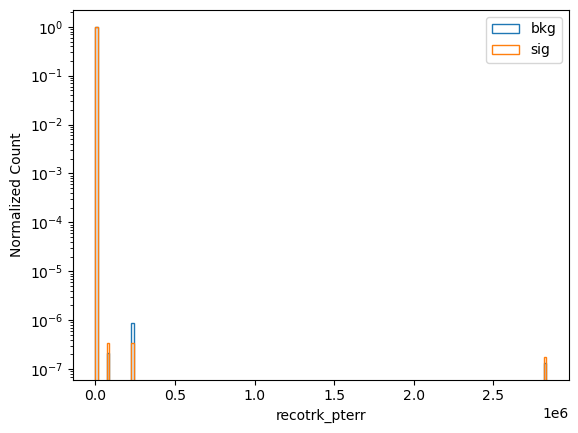

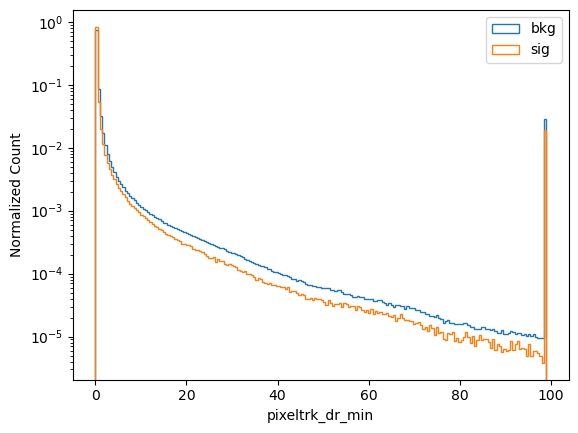

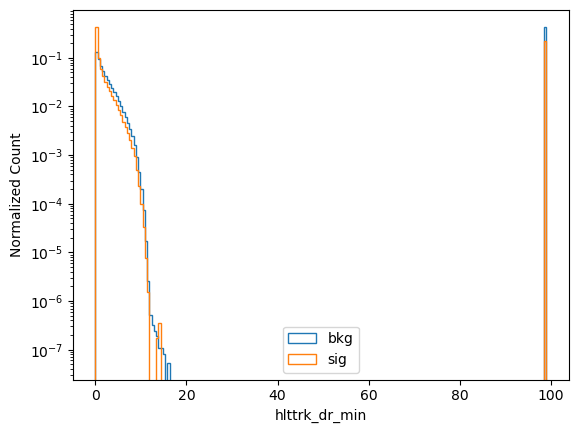

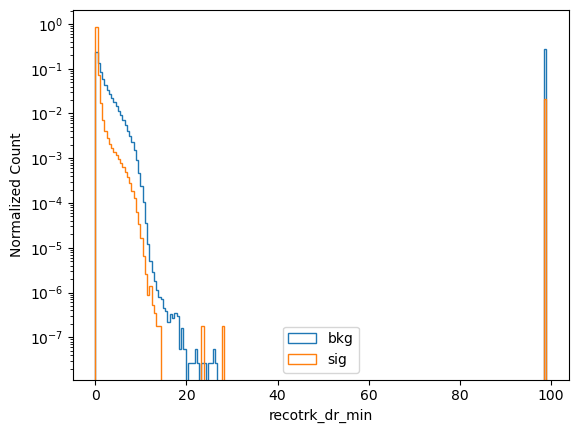

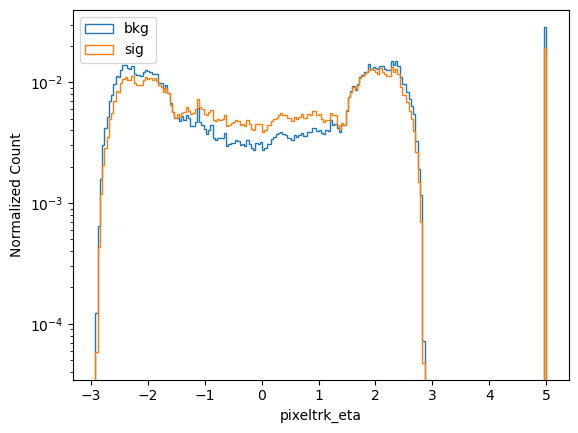

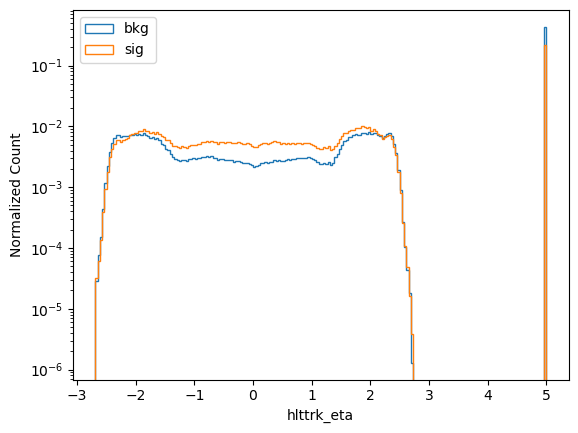

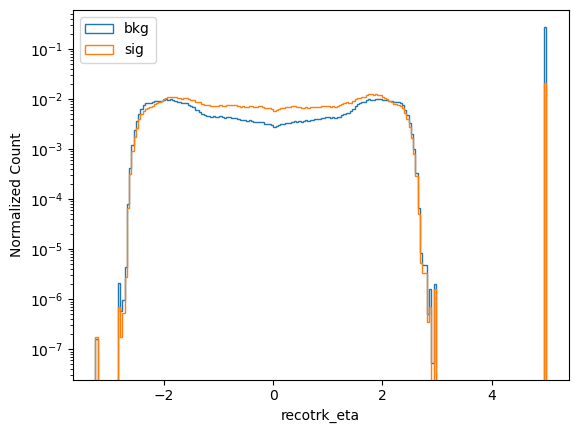

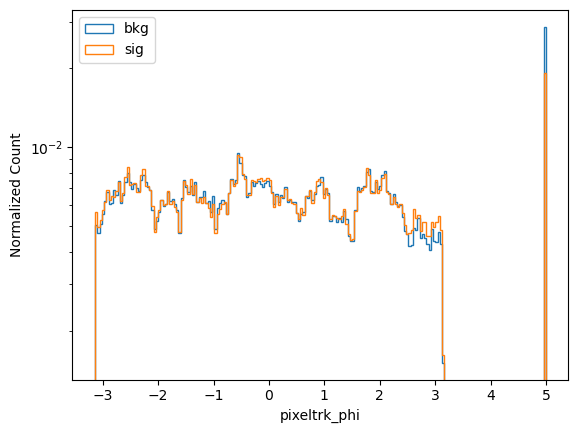

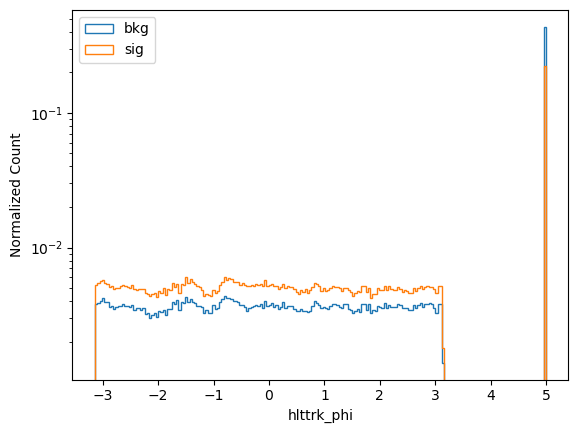

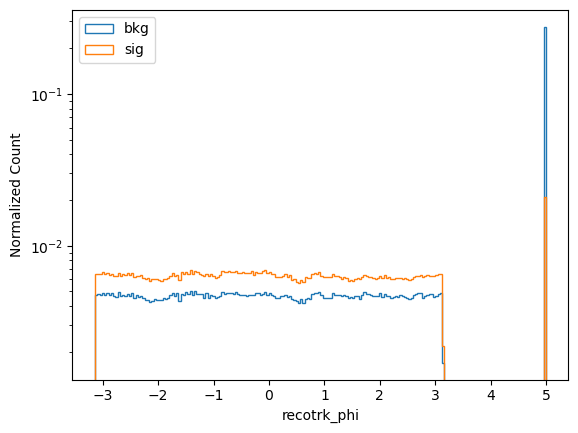

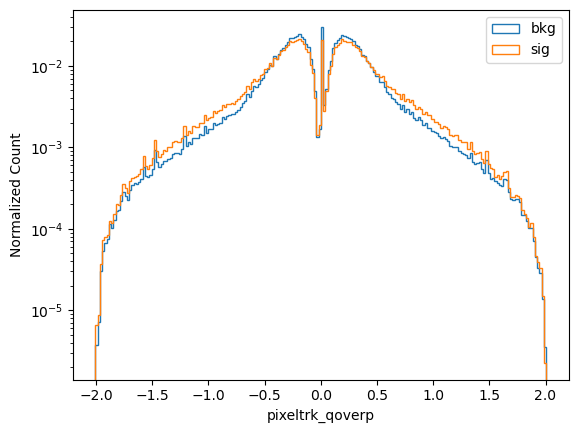

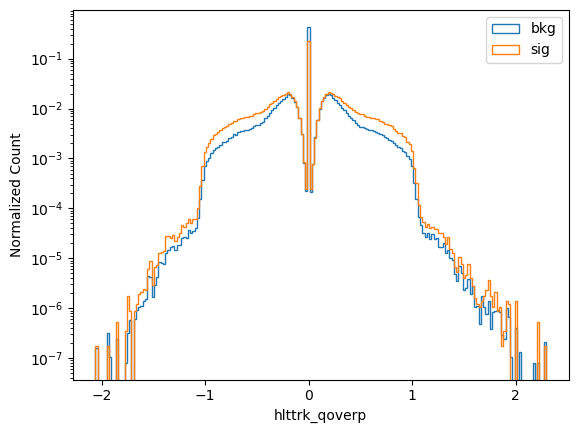

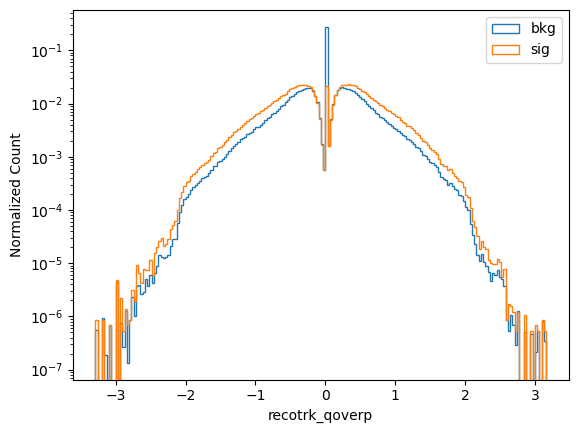

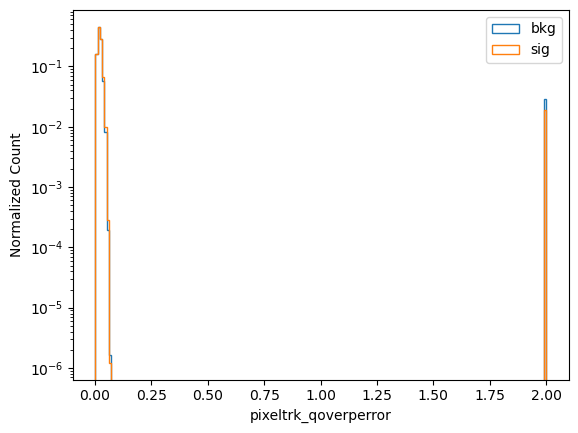

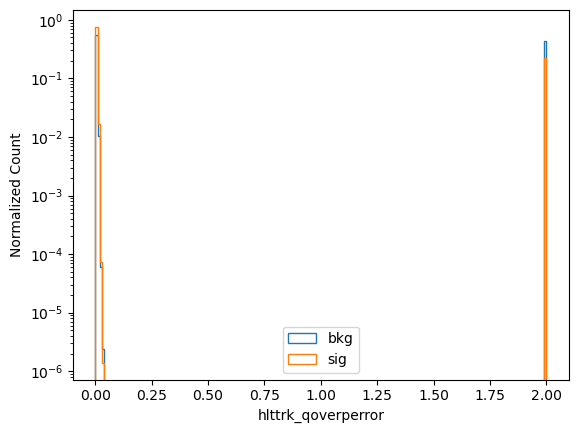

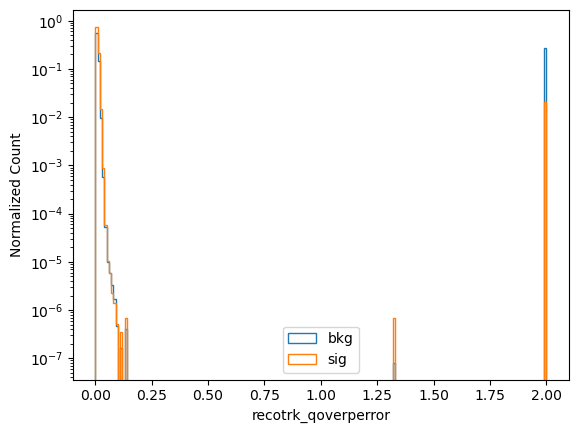

In [49]:
plt.figure(figsize=(8,6))
for var in branches_to_load:
  if var == 'target': continue
  ranges = (df[var].min(), df[var].max())
  data_range = df[var].max() - df[var].min()
  bins = int(np.ceil( data_range / (data_range * 0.005)))
  if pd.api.types.is_integer_dtype(df[var]):
     ranges = (df[var].min() - 0.5, df[var].max() + 0.5)
     bins = df[var].max() - df[var].min()
  for label in [0,1]:
      data = df[(df['target']==label)][var]
      weights = np.ones_like(data) / len(data)
      plt.hist(data, weights=weights,bins=bins, range=ranges, histtype='step',label='sig' if label==1 else 'bkg')
      plt.yscale('log')
      
  plt.xlabel(var)
  plt.ylabel("Normalized Count")
  plt.legend()
  plt.show()

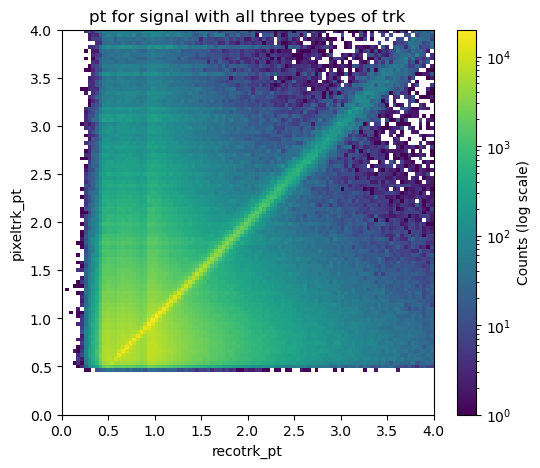

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Filter your DataFrame
filtered = (df['hlttrk_dr_min'] != 99) & (df['recotrk_dr_min'] != 99) & (df['pixeltrk_dr_min'] != 99) & (df['target'] == 1)
df_filtered = df[filtered]

# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_pt'],
    df_filtered['pixeltrk_pt'],
    bins=100,
    range=[[0, 4], [0, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_pt')
ax.set_ylabel('pixeltrk_pt')
ax.set_title('pt for signal with all three types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()


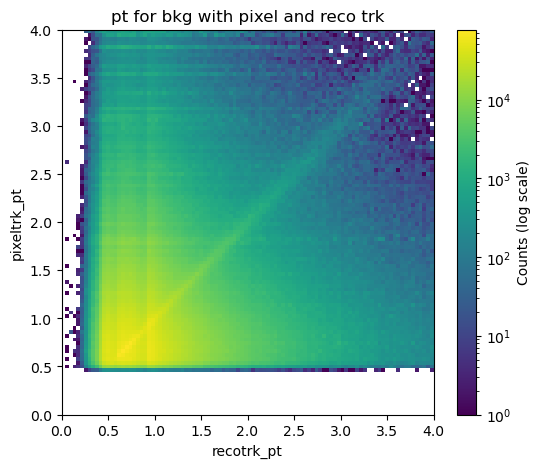

In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Filter your DataFrame
filtered = (df['target'] == 0) & (df['pixeltrk_pt'] != 0) & (df['recotrk_pt'] != 0)
df_bkg = df[filtered]

# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_bkg['recotrk_pt'],
    df_bkg['pixeltrk_pt'],
    bins=100,
    range=[[0, 4], [0, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_pt')
ax.set_ylabel('pixeltrk_pt')
ax.set_title('pt for bkg with pixel and reco trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()


In [60]:
print('reco track with pt < 0.05 ', ((df_filtered['recotrk_pt']>0) & (df_filtered['recotrk_pt'] < 0.05)).sum())

reco track with pt < 0.05  0


In [61]:
print('pixel track with pt < 0.45 ', ((df_filtered['pixeltrk_pt'] <0) & (df_filtered['pixeltrk_pt'] < 0.45)).sum())

pixel track with pt < 0.45  0


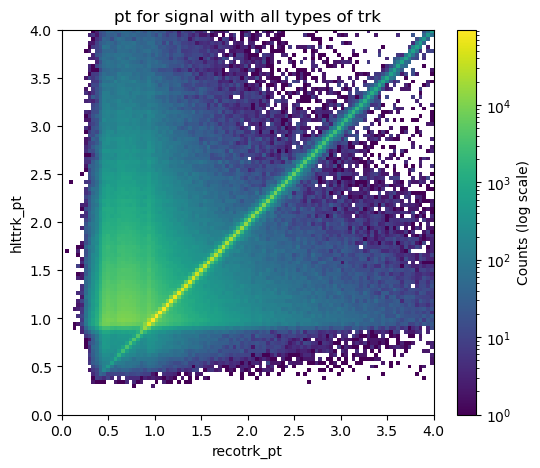

In [62]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_pt'],
    df_filtered['hlttrk_pt'],
    bins=100,
    range=[[0, 4], [0, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_pt')
ax.set_ylabel('hlttrk_pt')
ax.set_title('pt for signal with all types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

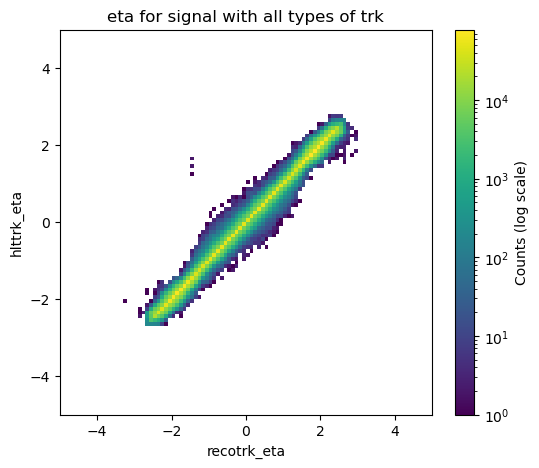

In [63]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_eta'],
    df_filtered['hlttrk_eta'],
    bins=100,
    range=[[-5, 5], [-5, 5]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_eta')
ax.set_ylabel('hlttrk_eta')
ax.set_title('eta for signal with all types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

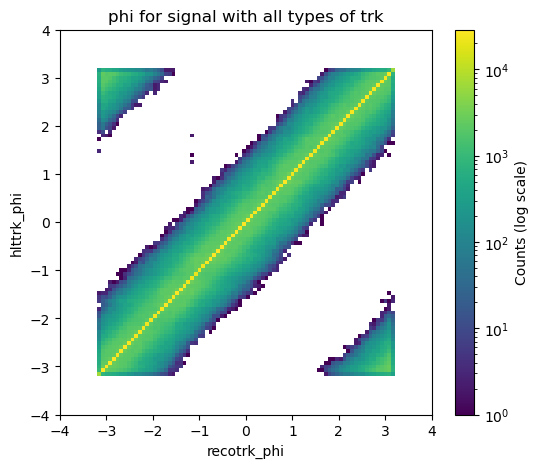

In [64]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_phi'],
    df_filtered['hlttrk_phi'],
    bins=100,
    range=[[-4, 4], [-4, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_phi')
ax.set_ylabel('hlttrk_phi')
ax.set_title('phi for signal with all types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

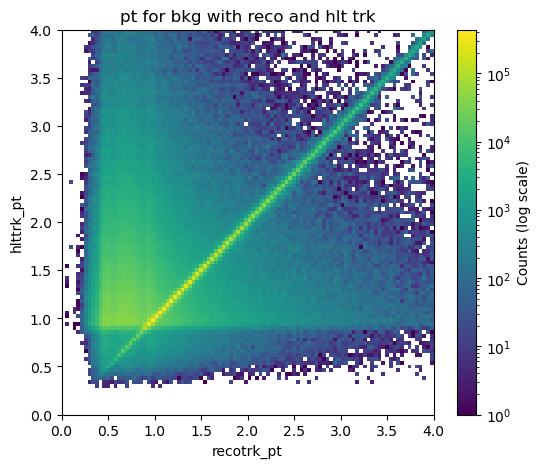

In [37]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

filtered = (df['target'] == 0) & (df['hlttrk_dr_min'] != 99) & (df['recotrk_dr_min'] != 99)
df_bkg = df[filtered]

# 2D histogram
h = ax.hist2d(
    df_bkg['recotrk_pt'],
    df_bkg['hlttrk_pt'],
    bins=100,
    range=[[0, 4], [0, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_pt')
ax.set_ylabel('hlttrk_pt')
ax.set_title('pt for bkg with reco and hlt trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

In [38]:
print('hlt track with pt < 0.2 ', ((df_filtered['hlttrk_pt'] >0) & (df_filtered['hlttrk_pt'] < 0.2)).sum())

hlt track with pt < 0.2  0


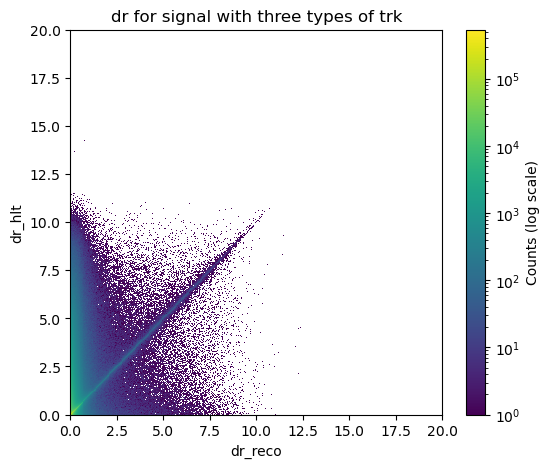

In [39]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_dr_min'],
    df_filtered['hlttrk_dr_min'],
    bins=400,
    range=[[0, 20], [0, 20]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('dr_reco')
ax.set_ylabel('dr_hlt')
ax.set_title('dr for signal with three types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

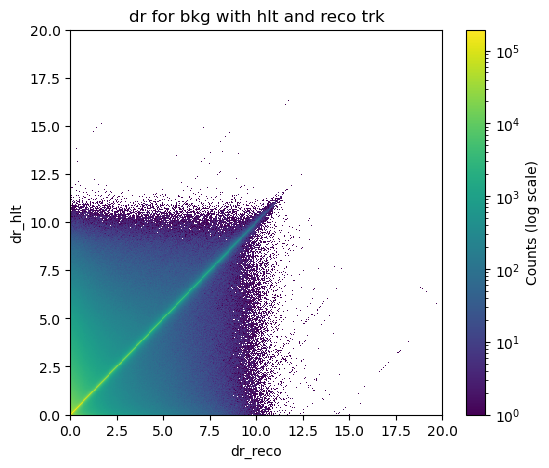

In [40]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

filtered = (df['target'] == 0) & (df['hlttrk_dr_min'] != 99 & (df['recotrk_dr_min'] != 99))
df_bkg = df[filtered]
# 2D histogram
h = ax.hist2d(
    df_bkg['recotrk_dr_min'],
    df_bkg['hlttrk_dr_min'],
    bins=400,
    range=[[0, 20], [0, 20]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('dr_reco')
ax.set_ylabel('dr_hlt')
ax.set_title('dr for bkg with hlt and reco trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

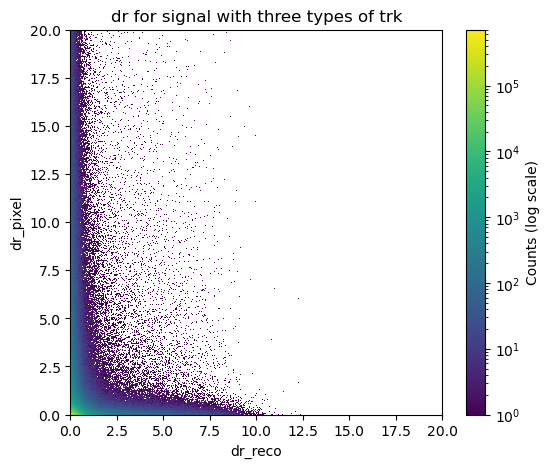

In [41]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_dr_min'],
    df_filtered['pixeltrk_dr_min'],
    bins=400,
    range=[[0, 20], [0, 20]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('dr_reco')
ax.set_ylabel('dr_pixel')
ax.set_title('dr for signal with three types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

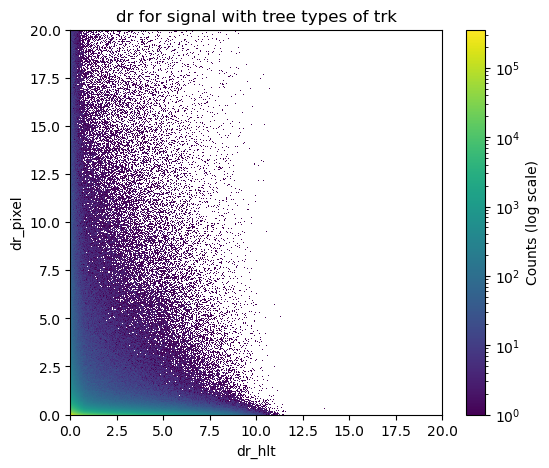

In [42]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['hlttrk_dr_min'],
    df_filtered['pixeltrk_dr_min'],
    bins=400,
    range=[[0, 20], [0, 20]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('dr_hlt')
ax.set_ylabel('dr_pixel')
ax.set_title('dr for signal with tree types of trk')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

In [16]:
print('fraction of signal, found with hlttrack: ', ((df['target'] == 1) & (df['hlttrk_dr_min'] != 99)).sum() / (df['target'] == 1).sum(), '\t and mean: ', (df[(df['target']==1) & (df['hlttrk_dr_min'] != 99)]['hlttrk_dr_min']).mean()) 

fraction of signal, found with hlttrack:  0.7777639507763396 	 and mean:  2.004296


In [17]:
print('fraction of bkg, found with hlttrack: ', ((df['target'] == 0) & (df['hlttrk_dr_min'] != 99)).sum() / (df['target'] == 0).sum(), '\t and mean: ', (df[(df['target']==0) & (df['hlttrk_dr_min'] != 99)]['hlttrk_dr_min']).mean()) 

fraction of bkg, found with hlttrack:  0.5651310082105566 	 and mean:  2.718287


In [18]:
print('fraction of signal, found with recotrk: ', ((df['target'] == 1) & (df['recotrk_dr_min'] != 99)).sum() / (df['target'] == 1).sum(), '\t and mean:', (df[(df['target']==1) & (df['recotrk_dr_min'] != 99)]['recotrk_dr_min']).mean()) 

fraction of signal, found with recotrk:  0.9790325723486231 	 and mean: 1.7852782


In [59]:
print('fraction of signal, found with pixeltrk, hlttrak, recotrk: ', ((df['target'] == 1) & (df['recotrk_dr_min'] != 99) & (df['hlttrk_dr_min'] != 99) & (df['pixeltrk_dr_min'] != 99)).sum() / (df['target'] == 1).sum()) 

fraction of signal, found with pixeltrk, hlttrak, recotrk:  0.5272454748984935


In [60]:
print('fraction of bkg, found with recotrk: ', ((df['target'] == 0) & (df['recotrk_dr_min'] != 99)).sum() / (df['target'] == 0).sum(), '\t and mean: ', (df[(df['target'] == 0) & (df['recotrk_dr_min'] != 99)]['recotrk_dr_min']).mean()) 

fraction of bkg, found with recotrk:  0.34718211808897564 	 and mean:  2.7126453


In [61]:
print('fraction of signal, found with pixeltrk: ', ((df['target'] == 1) & (df['pixeltrk_dr_min'] != 99)).sum() / (df['target'] == 1).sum(), '\t and mean: ', (df[(df['target'] == 1) & (df['pixeltrk_dr_min'] != 99)]['pixeltrk_dr_min']).mean()) 

fraction of signal, found with pixeltrk:  0.9511440822676736 	 and mean:  30.478203


In [62]:
print('fraction of bkg, found with pixeltrk: ', ((df['target'] == 0) & (df['pixeltrk_dr_min'] != 99)).sum() / (df['target'] == 0).sum(), '\t and mean: ', (df[(df['target'] == 0) & (df['pixeltrk_dr_min'] != 99)]['pixeltrk_dr_min']).mean()) 

fraction of bkg, found with pixeltrk:  0.9421441222873055 	 and mean:  32.960922


In [63]:
print('fraction of signal, found with hlttrack: ', ((df['target'] == 1) & (df['hlttrk_dr_min'] != 99)).sum() / (df['target'] == 1).sum(), '\t and mean pt: ', (df[(df['target']==1) & (df['hlttrk_dr_min'] != 99)]['hlttrk_pt']).mean()) 

fraction of signal, found with hlttrack:  0.5498425226729404 	 and mean pt:  1.596657


In [64]:
print('fraction of signal, found with recotrk: ', ((df['target'] == 1) & (df['recotrk_dr_min'] != 99)).sum() / (df['target'] == 1).sum(), '\t and mean pt:', (df[(df['target']==1) & (df['recotrk_dr_min'] != 99)]['recotrk_pt']).mean()) 

fraction of signal, found with recotrk:  0.9625564451865063 	 and mean pt: 1.3764865


In [65]:
print('highest pt of signal, found with recotrk: ', df[(df['target']==1) & (df['recotrk_dr_min'] != 99)]['recotrk_pt'][:20], '\t dr: ', df[(df['target'] ==1) & (df['recotrk_dr_min'] != 99)]['recotrk_dr_min'][:20]) 

highest pt of signal, found with recotrk:  5     0.703440
14    0.801956
17    0.801956
21    1.211711
24    1.211711
28    0.749469
39    0.568505
40    0.568505
42    1.091042
43    1.091042
46    1.091042
47    1.091042
71    2.117781
74    2.117781
77    2.117781
88    2.282089
89    2.282089
92    2.282089
95    2.282089
96    0.971601
Name: recotrk_pt, dtype: float32 	 dr:  5     0.062341
14    0.032547
17    0.031128
21    0.009938
24    0.004714
28    0.073724
39    0.019477
40    0.028017
42    0.025166
43    0.020495
46    0.020700
47    0.020828
71    0.000533
74    0.001042
77    0.000828
88    0.055288
89    2.294810
92    2.014794
95    0.047816
96    1.475923
Name: recotrk_dr_min, dtype: float32


In [66]:
print('highest pt of signal, found with hlttrk: ', df[(df['target']==1) & (df['hlttrk_dr_min'] != 99)]['hlttrk_pt'][:20], '\t and dr: ', df[(df['target']==1) & (df['hlttrk_dr_min'] != 99)]['hlttrk_dr_min'][:20]) 

highest pt of signal, found with hlttrk:  21     1.214598
24     1.214598
42     1.092603
43     1.092603
46     1.092603
47     1.092603
88     2.232155
89     2.232155
92     2.232155
95     2.232155
152    0.924878
156    1.113783
157    1.113783
163    0.989247
164    0.989247
166    0.924878
224    1.124136
225    1.124136
226    1.124136
227    1.124136
Name: hlttrk_pt, dtype: float32 	 and dr:  21     0.007473
24     0.001699
42     0.024707
43     0.020041
46     0.020104
47     0.020233
88     0.035869
89     2.275390
92     1.996618
95     0.029640
152    0.073798
156    0.046992
157    0.048675
163    0.057908
164    0.051178
166    0.063453
224    2.595485
225    1.922899
226    0.046204
227    0.046268
Name: hlttrk_dr_min, dtype: float32
